# What Journals Have Been Citing My Organization? 

This notebook shows how to use the [Dimensions Analytics API](https://www.dimensions.ai/dimensions-apis/) to discover what academic journals are most frequenlty citing publications from authors affiliation to a selected research organization. 

We start from a [GRID](https://grid.ac/) identifier (representing a research organization in Dimensions) and then select all publications citing research where at least one author is/as affiliated to that GRID ID. We then group this publications by source (journal) and sort them by frequency.  


## 1. Load libraries and log in

In [1]:
username = ""  #@param {type: "string"}
password = ""  #@param {type: "string"}
endpoint = "https://app.dimensions.ai"  #@param {type: "string"}

#
!pip install dimcli plotly_express -U --quiet 
!mkdir extraction4
#
# API library
import dimcli
from dimcli.shortcuts import *
dimcli.login(username, password, endpoint)
dsl = dimcli.Dsl()
#
# other libraries
import plotly_express as px
import pandas as pd
from pandas.io.json import json_normalize
import time
import json
from tqdm import tqdm_notebook as pbar


DimCli v0.6.1 - Succesfully connected to <https://app.dimensions.ai> (method: manual login)


## 2. Choose a Fraunhofer Research Organization

Dimensions uses GRID to identify research-related organizations, eg https://grid.ac/institutes/grid.89170.37 

In [64]:
#@markdown Please choose a specific member of the Fraunhofer Society,  then run this cell.

GRIDID = "grid.461628.f"  #@param ['Fraunhofer Institute for Laser Technology == grid.461628.f', 'Fraunhofer Institute for Molecular Biology and Applied Ecology == grid.418010.c', 'Fraunhofer Institute for Production Technology == grid.461634.2', 'Fraunhofer Research Institution for Casting, Composite and Processing Technology == grid.506241.4', 'Fraunhofer Institute for Telecommunications, Heinrich Hertz Institute == grid.435231.2', 'Fraunhofer Institute for Open Communication Systems == grid.469837.7', 'Fraunhofer Institute for Production Systems and Design Technology == grid.469819.b', 'Fraunhofer Institute for Reliability and Microintegration == grid.469839.9', 'Fraunhofer Institute for Wood Research Wilhelm-Klauditz-Institut == grid.469829.8', 'Fraunhofer Institute for Surface Engineering and Thin Films == grid.462227.7', 'Fraunhofer Institute for Digital Medicine == grid.428590.2', 'Fraunhofer Institute for Manufacturing Technology and Advanced Materials == grid.461617.3', 'Fraunhofer Institute for Wind Energy Systems == grid.8440.8', 'Fraunhofer Institute for Electronic Nano Systems == grid.469847.0', 'Fraunhofer Institute for Machine Tools and Forming Technology == grid.461651.1', 'Fraunhofer Institute for Structural Durability and System Reliability == grid.434481.e', 'Fraunhofer Institute for Computer Graphics Research == grid.461618.c', 'Fraunhofer Institute for Secure Information Technology == grid.469848.f', 'Fraunhofer Institute for Material Flow and Logistics == grid.469827.6', 'Fraunhofer Institute for Software and Systems Engineering == grid.469821.0', 'Fraunhofer Institute for Ceramic Technologies and Systems == grid.461622.5', 'Fraunhofer Institute for Organic Electronics, Electron Beam and Plasma Technology == grid.469851.7', 'Fraunhofer Institute for Photonic Microsystems == grid.469853.5', 'Fraunhofer Institute for Transportation and Infrastructure Systems == grid.469826.7', 'Fraunhofer Institute for Material and Beam Technology == grid.461641.0', 'Fraunhofer Institute for Microelectronic Circuits and Systems == grid.469854.2', 'Fraunhofer Institute for Integrated Circuits == grid.469850.6', 'Fraunhofer Institute for Integrated Circuits == grid.469823.2', 'Fraunhofer Institute for Integrated Systems and Device Technology == grid.469855.3', 'Fraunhofer Institute of Optronics, System Technologies and Image Exploitation == grid.466706.5', 'Fraunhofer Institute for Technological Trend Analysis == grid.469856.0', 'Fraunhofer Institute for Applied Solid State Physics == grid.424642.2', 'Fraunhofer Institute for High-Speed Dynamics, Ernst-Mach-Institut == grid.461627.0', 'Fraunhofer Institute for Physical Measurement Techniques == grid.461631.7', 'Fraunhofer Institute for Solar Energy Systems == grid.434479.9', 'Fraunhofer Institute for Mechanics of Materials == grid.461645.4', 'Fraunhofer Institute for Process Engineering and Packaging == grid.466709.a', 'Fraunhofer Institute for Microstructure of Materials and Systems == grid.469857.1', 'Fraunhofer Research Institution for Additive Manufacturing Technologies == grid.506239.b', 'Fraunhofer Institute for Toxicology and Experimental Medicine == grid.418009.4', 'Fraunhofer Institute for Ceramic Technologies and Systems == grid.461622.5', 'Fraunhofer Institute for Building Physics == grid.469871.5', 'Fraunhofer Institute for Digital Media Technology  == grid.469861.4', 'Fraunhofer Institute for Silicon Technology == grid.469817.5', 'Fraunhofer Institute for Applied Optics and Precision Engineering == grid.418007.a', 'Fraunhofer Institute for Experimental Software Engineering == grid.469863.6', 'Fraunhofer Institute for Industrial Mathematics == grid.461635.3', 'Fraunhofer Institute of Optronics, System Technologies and Image Exploitation == grid.466706.5', 'Fraunhofer Institute for Systems and Innovation Research == grid.459551.9', 'Fraunhofer Institute for Energy Economics and Energy System Technology == grid.506250.4', 'Fraunhofer Center for International Management and Knowledge Economy == grid.462230.1', 'Fraunhofer Institute for Cell Therapy and Immunology == grid.418008.5', 'Fraunhofer Research Institution for Marine Biotechnology and Cell Technology == grid.469834.4', 'Fraunhofer Institute for Factory Operation and Automation == grid.469818.a', 'Fraunhofer Institute for Microengineering and Microsystems == grid.28894.3f', 'Fraunhofer Institute for Embedded Systems and Communication Technologies == grid.469865.0', 'Fraunhofer Research Institution for Microsystems and Solid State Technologies == grid.469866.3', 'Fraunhofer Institute for Applied and Integrated Security == grid.469867.2', 'Fraunhofer Institute for Environmental, Safety, and Energy Technology == grid.424428.c', 'Fraunhofer Institute for Mechatronic Systems Design == grid.469868.d', 'Fraunhofer Institute for Chemical Technology == grid.461616.2', 'Fraunhofer Institute for Applied Polymer Research == grid.461615.1', 'Fraunhofer Research Institution for Large Structures in Production Engineering == grid.506226.5', 'Fraunhofer Institute for Nondestructive Testing == grid.469830.0', 'Fraunhofer Institute for Algorithms and Scientific Computing == grid.418688.b', 'Fraunhofer Institute for Applied Information Technology == grid.469870.4', 'Fraunhofer Institute for Intelligent Analysis and Information Systems == grid.469822.3', 'Fraunhofer Institute for Molecular Biology and Applied Ecology == grid.418010.c', 'Fraunhofer Institute for Industrial Engineering == grid.434477.7', 'Fraunhofer Institute for Building Physics == grid.469871.5', 'Fraunhofer Institute for Interfacial Engineering and Biotechnology == grid.469831.1', 'Fraunhofer Institute for Manufacturing Engineering and Automation == grid.469833.3', 'Fraunhofer Information Center for Planning and Building == grid.469872.6', 'Fraunhofer Institute for Biomedical Engineering == grid.452493.d', 'Fraunhofer Institute for High Frequency Physics and Radar Techniques == grid.461619.d', 'Fraunhofer Institute for Communication, Information Processing and Ergonomics == grid.469836.6', 'Fraunhofer Institute for Silicate Research == grid.424644.4']
    
#@markdown The start/end year of publications used to extract patents
YEAR_START = 2000 #@param {type: "slider", min: 1950, max: 2020}
YEAR_END = 2016 #@param {type: "slider", min: 1950, max: 2020}

if YEAR_END < YEAR_START:
  YEAR_END = YEAR_START

try:
    if "==" in GRIDID: GRIDID = GRIDID.split("==")[1].strip() 
    print("Selection: ", GRIDID)
except:
    print("Please select an organization")
    raise

#
# util for saving results
#
def save_as_csv(df, save_name_without_extension):
    "usage: `save_as_csv(dataframe, 'filename')`"
    folder = "extraction4/"
    df.to_csv(f"{folder}{save_name_without_extension}.csv", index=False)
    print("===\nSaved: ", f"{folder}{save_name_without_extension}.csv")
   
    
#
# gen link to Dimensions
#

def dimensions_url(grids):
    root = "https://app.dimensions.ai/discover/publication?or_facet_research_org="
    return root + "&or_facet_research_org=".join([x for x in grids])

from IPython.core.display import display, HTML
display(HTML('---<br /><a href="{}">Open {} in Dimensions &#x29c9;</a>'.format(dimensions_url([GRIDID]), GRIDID)))


#@markdown ---

Selection:  grid.461628.f


## 3. Building a Publications Baseset

First we extract all publications where at least one of the authors is affiliated to GRID_ORG. 

This will then let us query for citing publications using the `reference_ids` field (see the [Dimensions API data model](https://docs.dimensions.ai/dsl/data-model.html) for more details). 

In [9]:
publications = dsl.query_iterative(f"""
search publications 
    where research_orgs.id = "{GRIDID}"
    and year in [{YEAR_START}:{YEAR_END}]
    return publications[id+title+doi+year]
""")

#
# save the data
pubs_cited = publications.as_dataframe()
save_as_csv(pubs_cited, f"pubs_{GRIDID}")

640 / 640
===
Saved:  extraction4/pubs_grid.461628.f.csv


## 4. Extracting Publications Citing the Baseset

In the next step we extract all publications citing the publications previously extracted. This query will return JSON data which can be further analyzed e.g. to count the unique number of journals they were published in.

E.g.:

```
'publications': [
  {'journal': {'id': 'jour.1295784',
    'title': 'IEEE Transactions on Cognitive and Developmental Systems'},
   'publisher': 'Institute of Electrical and Electronics Engineers (IEEE)',
   'year': 2018,
   'id': 'pub.1061542201',
   'issn': ['2379-8920', '2379-8939']},
  {'journal': {'id': 'jour.1043581', 'title': 'International Geology Review'},
   'publisher': 'Taylor & Francis',
   'year': 2018,
   'id': 'pub.1087302818',
   'issn': ['0020-6814', '1938-2839']}, etc..
```

This is query template we use. 

In [16]:
query_template = """search publications 
                where journal is not empty 
                and reference_ids in {}
            return publications[id+journal+issn+year+publisher]"""

Note the `{}` part which is where we will put lists of publication IDs (from the previous extraction) during each iteration. This is to ensure our query is never too long (<400 IDs is a good way to ensure we never get an API error).

In [66]:
from tqdm import tqdm_notebook as pbar

pubids = list(pubs_cited['id'])

#
# loop through all source-publications IDs in chunks and query Dimensions 

print("===\nExtracting publications data ...")
results = []
BATCHSIZE = 200
VERBOSE = False # set to True to see extraction logs

for chunk in pbar(list(chunks_of(pubids, BATCHSIZE))):
    query = query_template.format(json.dumps(chunk))
    data = dsl.query_iterative(query, verbose=VERBOSE)
    results += data.publications
    time.sleep(0.5)
    

#
# put the citing pub data into a dataframe, remove duplicates and save

pubs_citing = pd.DataFrame().from_dict(results)
print("===\nCiting Publications found: ", len(pubs_citing))
pubs_citing.drop_duplicates(subset='id', inplace=True)
print("Unique Citing Publications found: ", len(pubs_citing))

#
# split up nested journal columns into two columns
journals = pubs_citing['journal'].apply(pd.Series).rename(columns={"id": "journal.id", "title": "journal.title"})
pubs_citing = pd.concat([pubs_citing.drop(['journal'], axis=1), journals], axis=1)

#
# save
save_as_csv(pubs_citing, f"pubs_citing_{GRIDID}")

#
# preview the data
print("===\nPreview:")
pubs_citing.head(10)

===
Extracting publications data ...



===
Citing Publications found:  7122
Unique Citing Publications found:  6373
===
Saved:  extraction4/pubs_citing_grid.461628.f.csv


,year,publisher,id,issn,journal.id,journal.title
0,2020,Elsevier,pub.1121519453,"[0924-0136, 1873-4774]",jour.1038302,Journal of Materials Processing Technology
1,2020,Elsevier,pub.1122305701,"[0020-7403, 1879-2162]",jour.1137044,International Journal of Mechanical Sciences
2,2020,Elsevier,pub.1120137706,"[0736-5845, 1879-2537]",jour.1044008,Robotics and Computer-Integrated Manufacturing
3,2020,Elsevier,pub.1121451618,"[0301-679X, 1879-2464]",jour.1050230,Tribology International
4,2020,IOP Publishing,pub.1121266384,"[0953-8984, 1361-648X]",jour.1031859,Journal of Physics Condensed Matter
5,2020,IOP Publishing,pub.1121232286,"[0022-3727, 1361-6463]",jour.1054347,Journal of Physics D
6,2020,Elsevier,pub.1121717305,"[0890-6955, 1879-2170]",jour.1137254,International Journal of Machine Tools and Man...
7,2020,Elsevier,pub.1120862707,"[0928-4931, 1873-0191]",jour.1040557,Materials Science and Engineering C
8,2020,Elsevier,pub.1121193278,"[0959-6526, 1879-1786]",jour.1044002,Journal of Cleaner Production
9,2020,Elsevier,pub.1121002689,"[0925-8388, 1873-4669]",jour.1041821,Journal of Alloys and Compounds


## 5. Journal Analysis
Finally, we can analyze the citing publications by grouping them by source journal. This can be achieved easily thanks to pandas' Dataframe methods.  

> [pandas](https://pandas.pydata.org/pandas-docs/stable/) is a popular Python software library for data manipulation and analysis

#### Unique journals

In [67]:
pubs_citing['journal.id'].describe()

count             6373
unique            1087
top       jour.1312104
freq               291
Name: journal.id, dtype: object

#### Most frequent journals

In [68]:
# 
# count journals and rename columns
journals = pubs_citing['journal.title'].value_counts()
journals = journals.to_frame().reset_index().rename(columns= {"index": 'journal.title', 'journal.title': 'count'})
journals.index.name = 'index'

#
# save
save_as_csv(journals, f"top_journals_citing_{GRIDID}")

#preview
journals.head(100)

===
Saved:  extraction4/top_journals_citing_grid.461628.f.csv


,journal.title,count
index,,
0,Proceedings of SPIE,291
1,Spectrochimica Acta Part B Atomic Spectroscopy,281
2,Optics Express,164
3,The International Journal of Advanced Manufact...,135
4,Journal of Analytical Atomic Spectrometry,135
...,...,...
95,Proceedings of the Institution of Mechanical E...,11
96,Virtual and Physical Prototyping,11
97,Welding in the World,11


#### Top 100 journals chart

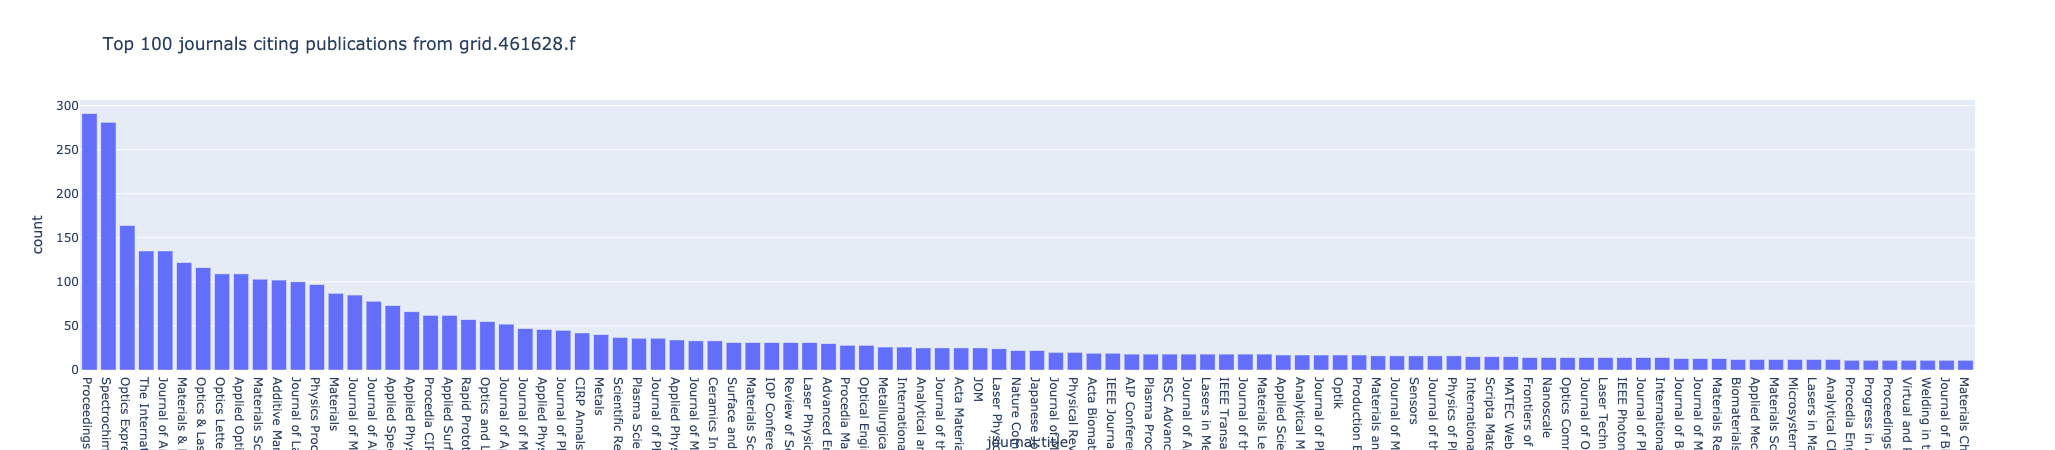

In [72]:
px.bar(journals[:100], x="journal.title", y="count", title=f"Top 100 journals citing publications from {GRIDID}")

#### Top 20 journals by year chart

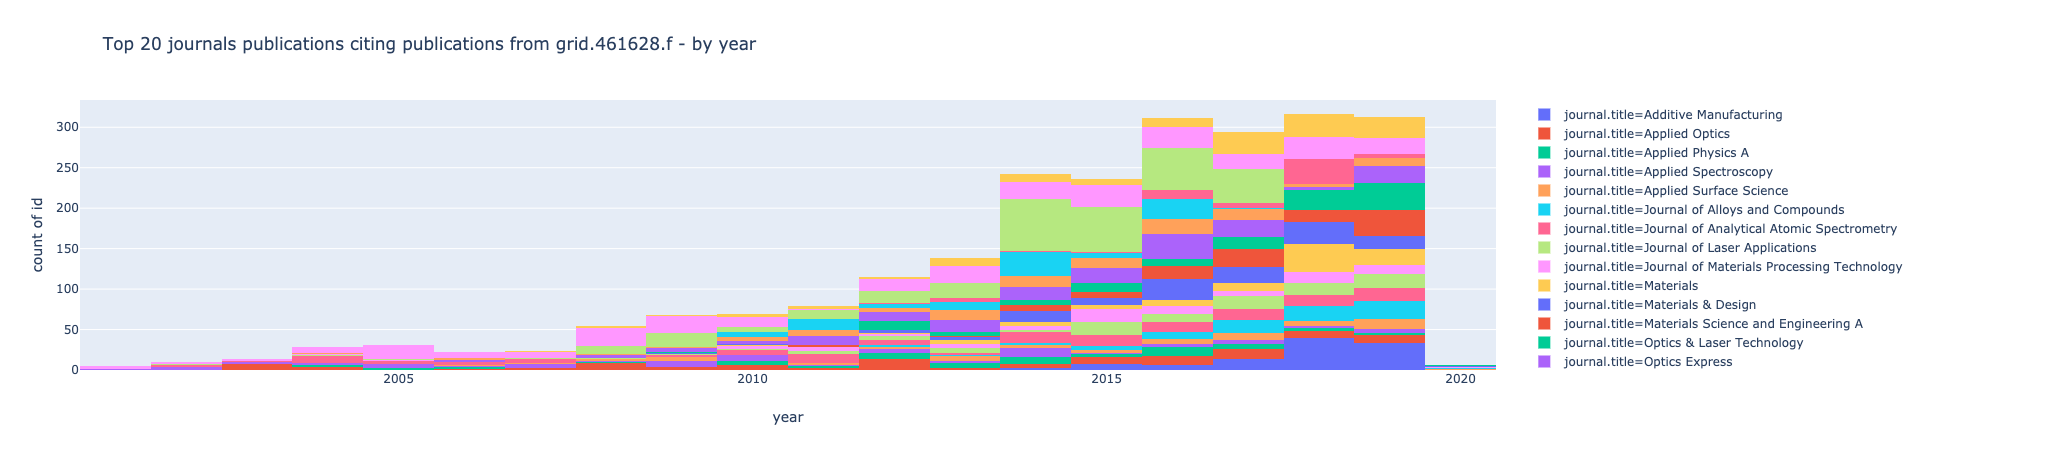

In [97]:
#
#
THRESHOLD = 20  #@param {type: "slider", min: 10, max: 100}
# suppress empty values
pubs_citing.fillna("-no value-", inplace=True)
# make publications list smaller by only showing top journals
pubs_citing_topjournals = pubs_citing[pubs_citing['journal.title'].isin(list(journals[:THRESHOLD]['journal.title']))].sort_values('journal.title')
# build histogram
px.histogram(pubs_citing_topjournals, x="year", y="id", 
                 color="journal.title", 
                title=f"Top {THRESHOLD} journals citing publications from {GRIDID} - by year")

---
## Want to learn more?


Make sure you check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which many tutorials and reusable Jupyter notebooks for scholarly data analytics. 